<a href="https://colab.research.google.com/github/VaeriaBautista/Simulaci-n-I/blob/main/desenso_acelerado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Punto inicial: [1.5 1. ]
Punto óptimo encontrado: [1.95357496e+29 1.69631086e+30]
Valor de la función en el óptimo: 5.793105628126131e+60
Gradiente en el óptimo: 6.79648341576814e+30
Número de iteraciones: 100


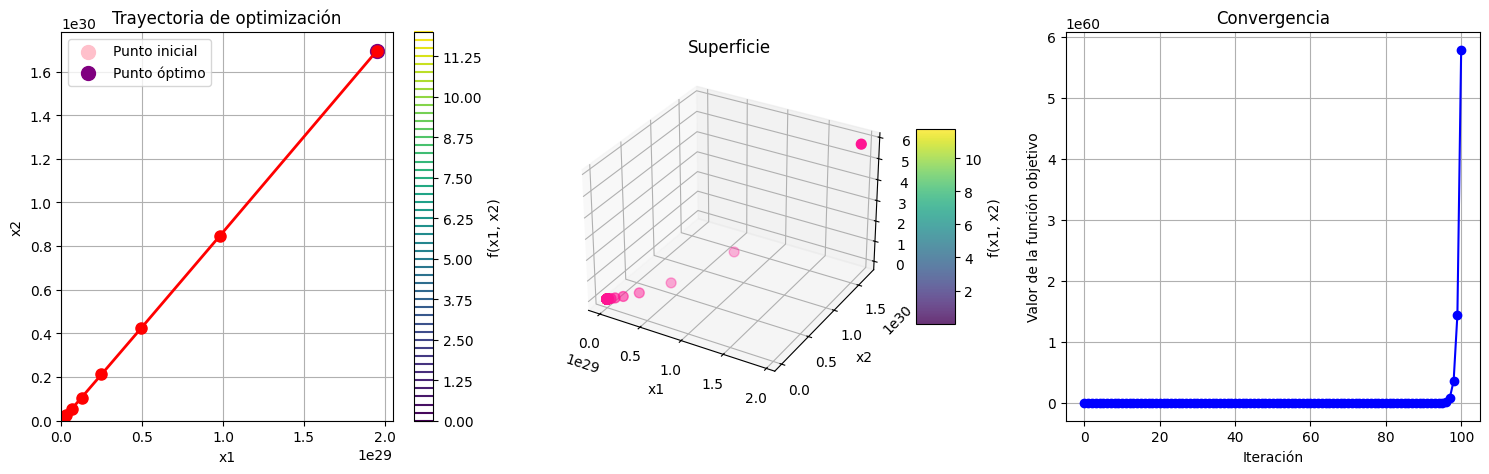

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def funcion_objetivo(x):
  return x[0]**2 + 2*x[1]**2

def gradiente(x):
  return np.array([2*x[0], 4*x[1]])

def tamano_paso_optimo(x, d):
  numerador = np.dot(gradiente(x), d)
  denominador = 2*d[0]**2+4*d[1]**2
  return numerador/denominador

def descenso_acelerado(x0, tolerancia=1e-6, max_iter=100):
  x = x0.copy()
  g = gradiente(x)
  d = -g.copy()
  valores_f = [funcion_objetivo(x)]
  trayectoria = [x.copy()]
  for k in range(max_iter):
    if np.linalg.norm(g) < tolerancia:
      break
    alfa = tamano_paso_optimo(x, d)
    x_new = x + alfa*d
    g_new = gradiente(x_new)
    beta = np.maximum(0, np.dot(g_new, g_new - g)/np.dot(g, g))
    d = -g_new + beta*d
    g = g_new.copy()
    x = x_new.copy()
    valores_f.append(funcion_objetivo(x))
    trayectoria.append(x.copy())
  return x, valores_f, np.array(trayectoria)


def visualizar_resultados(trayectoria, valores_f):
  plt.figure(figsize=(15,5))
  plt.subplot(1,3,1)
  x1 = np.linspace(-2, 2, 100)
  x2 = np.linspace(-2, 2, 100)
  X1, X2 = np.meshgrid(x1, x2)
  Z = X1**2 + 2*X2**2
  plt.contour(X1, X2, Z, 50, cmap='viridis')
  plt.colorbar(label='f(x1, x2)')
  plt.plot(trayectoria[:, 0], trayectoria[:, 1], 'ro-', linewidth=2, markersize=8)
  plt.scatter(trayectoria[0, 0], trayectoria[0, 1], color='pink', s=100, label='Punto inicial')
  plt.scatter(trayectoria[-1, 0], trayectoria[-1, 1], color='purple', s=100, label='Punto óptimo')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title('Trayectoria de optimización')
  plt.legend()
  plt.grid(True)
  ax = plt.subplot(1, 3, 2, projection='3d')
  surf = ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)
  ax.scatter(trayectoria[:, 0], trayectoria[:, 1],
              [funcion_objetivo(trayectoria[i]) for i in range(len(trayectoria))],
              color='deeppink', s=50, label='Trayectoria')
  plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='f(x1, x2)')
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  ax.set_zlabel('f(x1, x2)')
  ax.set_title('Superficie')
  plt.subplot(1, 3, 3)
  plt.plot(range(len(valores_f)), valores_f, 'b-o')
  plt.xlabel('Iteración')
  plt.ylabel('Valor de la función objetivo')
  plt.title('Convergencia')
  plt.grid(True)
  plt.tight_layout()
  plt.show()


x0 = np.array([1.5, 1.0])
x_optimo, valores_f, trayectoria = descenso_acelerado(x0)
print(f"Punto inicial: {x0}")
print(f"Punto óptimo encontrado: {x_optimo}")
print(f"Valor de la función en el óptimo: {funcion_objetivo(x_optimo)}")
print(f"Gradiente en el óptimo: {np.linalg.norm(gradiente(x_optimo))}")
print(f"Número de iteraciones: {len(valores_f) - 1}")
visualizar_resultados(trayectoria, valores_f)